In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns 
sns.set()

## Read files and join tables 

In [2]:
train = pd.read_csv('C:/Users/User/talkingdata/gender_age_train.csv',index_col=None)
phone = pd.read_csv('C:/Users/User/talkingdata/phone_brand_device_model_traditional.csv',index_col=None)
train_phone = pd.merge(train,phone,how='inner',left_on='device_id',right_on='device_id') 
print('shape: ',train_phone.shape)
train_phone.head()

shape:  (74839, 7)


,device_id,gender,age,group,Unnamed: 0,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,56800,小米,MI 2
1,-2897161552818060146,M,35,M32-38,41294,小米,MI 2
2,-8260683887967679142,M,35,M32-38,9993,小米,MI 2
3,-4938849341048082022,M,30,M29-31,179893,小米,紅米note
4,245133531816851882,M,30,M29-31,102570,小米,MI 3


In [3]:
import gc
del train
del phone
print(gc.collect())

39


## Drop columns

In [4]:
train_phone = train_phone.drop('Unnamed: 0',axis=1)
train_phone = train_phone.drop('device_model',axis=1)
train_phone = train_phone.drop('device_id',axis=1)
print('shape: ',train_phone.shape)
train_phone.head() 

shape:  (74839, 4)


,gender,age,group,phone_brand
0,M,35,M32-38,小米
1,M,35,M32-38,小米
2,M,35,M32-38,小米
3,M,30,M29-31,小米
4,M,30,M29-31,小米


## Check Missing Data

In [5]:
train_phone.isnull().any()

gender         False
age            False
group          False
phone_brand    False
dtype: bool

## Top 15 brand

In [6]:
train_phone_groupby = train_phone.groupby('phone_brand').count()
print('train_phone_groupby.shape: ',train_phone_groupby.shape)
train_phone_groupby.drop(['gender','age'],inplace=True,axis=1)
train_phone_groupby.sort_values('group',inplace=True,ascending=False)
train_phone_groupby.head(15)

train_phone_groupby.shape:  (120, 3)


,group
phone_brand,
小米,17336
三星,13706
華為,13001
OPPO,5802
vivo,5658
魅族,4710
酷派,3349
聯想,2695
金立,1124


In [7]:
train_phone_groupby = train_phone_groupby.iloc[0:15,:]
Top15_list = pd.Series(train_phone_groupby.index)
Top15_list.values

array(['小米', '三星', '華為', 'OPPO', 'vivo', '魅族', '酷派', '聯想', '金立', 'HTC',
       '中興', '樂視', '索尼', '努比亞', 'LG'], dtype=object)

## Translate top15_brand into english

In [8]:
Top15_list_english=['Xiaomi','Samsung','HUAWEI','OPPO','vivo','Meizu','Coolpad','Lenovo','Gionee','HTC','ZTE','LETV','SONY','Nubia','LG']
train_phone['phone_brand'].replace(Top15_list.values,Top15_list_english,inplace=True)
train_phone.head()

,gender,age,group,phone_brand
0,M,35,M32-38,Xiaomi
1,M,35,M32-38,Xiaomi
2,M,35,M32-38,Xiaomi
3,M,30,M29-31,Xiaomi
4,M,30,M29-31,Xiaomi


## Extract Top15 brand table

### Top15 List

In [9]:
Top15_mask = train_phone['phone_brand'].isin(Top15_list_english)
train_phone_Top15 = train_phone[Top15_mask]
print('train_phone_Top15.shape: ',train_phone_Top15.shape)
train_phone_Top15.head()

train_phone_Top15.shape:  (71551, 4)


,gender,age,group,phone_brand
0,M,35,M32-38,Xiaomi
1,M,35,M32-38,Xiaomi
2,M,35,M32-38,Xiaomi
3,M,30,M29-31,Xiaomi
4,M,30,M29-31,Xiaomi


### groupby brand

In [10]:
train_phone_Top15_groupby = train_phone_Top15.groupby('phone_brand').count()
train_phone_Top15_groupby.sort_values('age',inplace=True,ascending=False)
train_phone_Top15_groupby['per']=round(train_phone_Top15_groupby['age'] / train_phone_Top15.shape[0], 2)

### barplot

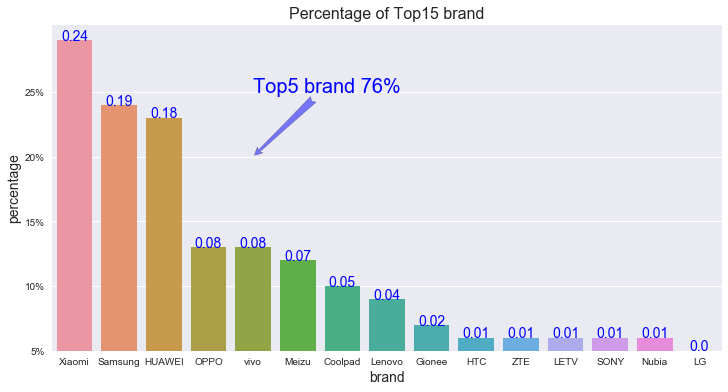

In [97]:
fig = plt.figure(1,figsize=(12,6))
sns.barplot(x = train_phone_Top15_groupby.index,y = 'per',data = train_phone_Top15_groupby)
plt.xlabel('brand',fontsize=14)
plt.ylabel('percentage',fontsize=14)
plt.title('Percentage of Top15 brand',fontsize=16)
plt.yticks(np.arange(0,0.25,step=0.05),['5%','10%','15%','20%','25%'])
for i in np.arange(15):
    values = train_phone_Top15_groupby['per'].values[i]
    plt.text(i,values,str(values),fontsize=14,color='blue',
            verticalalignment='baseline',horizontalalignment='center')
plt.annotate('Top5 brand 76%',xy=(4,0.15),xytext=(4,0.2),fontsize=20,color='blue',
            arrowprops=dict(facecolor='blue',arrowstyle='fancy',alpha=0.5))
plt.savefig('Percentage of Top15 brand',dpi=600)
plt.show()

### pie

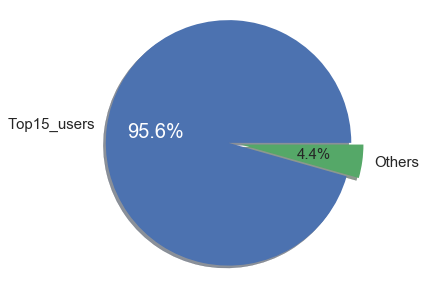

In [99]:
fig = plt.figure(1,figsize=(5,5))
top15_user = train_phone_Top15.shape[0]
other_user = train_phone.shape[0]-top15_user


patches, texts, autotexts = plt.pie([top15_user,other_user],
                                    labels=['Top15_users','Others'],
                                    shadow=True,
                                    explode=(0,0.1),
                                    autopct='%1.1f%%')
                                    
texts[0].set_fontsize(15) #set_font 'top15_users' 
texts[1].set_fontsize(15)
autotexts[0].set_fontsize(20)
autotexts[1].set_fontsize(15)
autotexts[0].set_color('white')

plt.axis('equal')
plt.savefig('percentage of top5',dpi=600)
plt.show()

## Split two tables (Male and Female)

In [13]:
train_phone_Top15_male = train_phone_Top15[train_phone_Top15['gender']=='M']
print('Male table: ',train_phone_Top15_male.shape)
train_phone_Top15_female = train_phone_Top15[train_phone_Top15['gender']=='F']
print('Female table: ',train_phone_Top15_female.shape)

Male table:  (45804, 4)
Female table:  (25747, 4)


In [14]:
train_phone_Top15_male.head(2)

,gender,age,group,phone_brand
0,M,35,M32-38,Xiaomi
1,M,35,M32-38,Xiaomi


## Top 15 by age

### Male

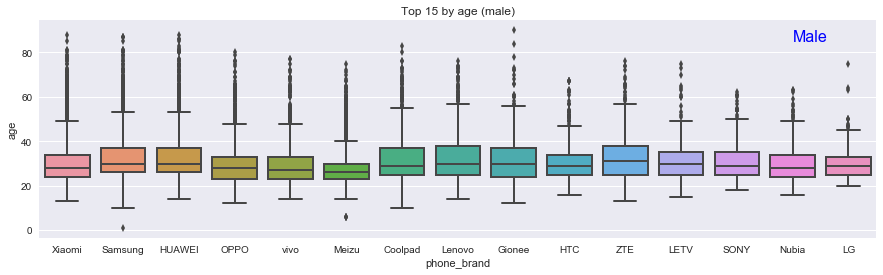

In [118]:
fig=plt.figure(2,(15,4))
sns.boxplot(x='phone_brand',y='age',data=train_phone_Top15_male,linewidth=2,order=Top15_list_english)
plt.title('Top 15 by age (male)')
plt.annotate('Male',xy=(1,60),xytext=(13,85),fontsize=16,color='Blue')
plt.savefig('top15_boxplot_male',dpi=600)
plt.show()

### Female

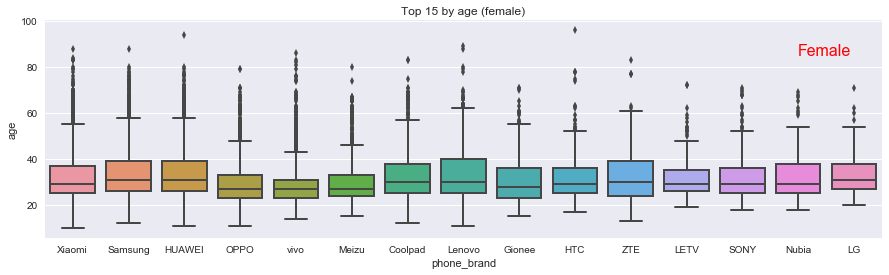

In [116]:
fig=plt.figure(2,(15,4))
sns.boxplot(x='phone_brand',y='age',data=train_phone_Top15_female,linewidth=2,order=Top15_list_english)
plt.title('Top 15 by age (female)')
plt.annotate('Female',xy=(1,60),xytext=(13,85),fontsize=16,color='red')
plt.savefig('top15_boxplot_female', dpi = 600)
plt.show()

## Top 15 by gender

### Top15 Data processing

In [17]:
hist_male = train_phone_Top15_male.groupby('phone_brand').sum()
hist_female = train_phone_Top15_female.groupby('phone_brand').sum()

# merge male and female
hist_sex = pd.merge(hist_male,hist_female,on=hist_male.index)
hist_sex.columns = ['key','male','female']

# add columns (percentage and total)
hist_sex['male_per'] = round(hist_sex['male']/(hist_sex['male']+hist_sex['female']),2)
hist_sex['female_per'] = 1-hist_sex['male_per']
hist_sex['total'] = hist_sex['male'] + hist_sex['female']

hist_sex.sort_values('total',inplace = True,ascending = False)
hist_sex.head()

,key,male,female,male_per,female_per,total
12,Xiaomi,346228,190960,0.64,0.36,537188
11,Samsung,268655,183190,0.59,0.41,451845
3,HUAWEI,283458,142360,0.67,0.33,425818
9,OPPO,94952,75953,0.56,0.44,170905
14,vivo,86944,76336,0.53,0.47,163280


### Numbers of users

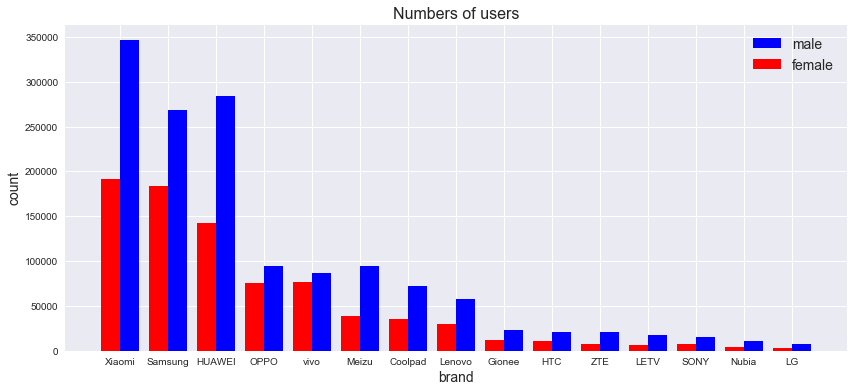

In [119]:
fig = plt.figure(1,figsize=(14,6))
plt.bar(hist_sex['key'],hist_sex['male'],align='edge',label='male',width=0.4,color='blue')
plt.bar(hist_sex['key'],hist_sex['female'],align='edge',label='female',width=-0.4,color='red')
plt.xlabel('brand',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.title('Numbers of users',fontsize=16)
plt.legend(loc='best',fontsize=14)
plt.savefig('Numbers of users',dpi=600)
plt.show()

### Percentage of users

#### bar plot

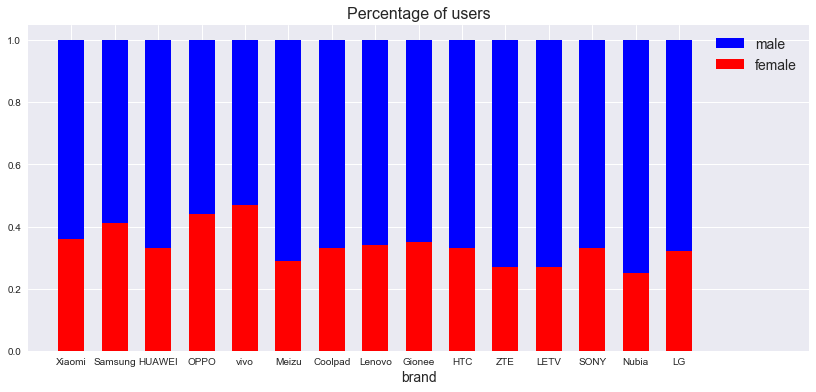

In [120]:
fig,ax = plt.subplots(1)
ax.bar(hist_sex['key'],hist_sex['male_per'],label='male',color='blue',bottom=hist_sex['female_per'],width=0.6)
ax.bar(hist_sex['key'],hist_sex['female_per'],label='female',color='red',width=0.6)

fig.set_figwidth(14)
fig.set_figheight(6)
ax.set_xbound(-1,17)
plt.xlabel('brand',fontsize=14)
plt.title('Percentage of users',fontsize=16)
plt.legend(loc='best',fontsize=14)
plt.savefig('Percentage of users',dpi=600)
plt.show()

## Top5 Distribution

### Top5 Data processing

In [20]:
top5_list = ['Xiaomi','Samsung','HUAWEI','OPPO','vivo']
top5_male = train_phone_Top15_male[train_phone_Top15_male['phone_brand'].isin(top5_list)]
top5_female = train_phone_Top15_female[train_phone_Top15_female['phone_brand'].isin(top5_list)]
top5_gender = pd.concat((top5_male,top5_female))
print('top5_gender.shape: ',top5_gender.shape)
top5_gender.head()

top5_gender.shape:  (55503, 4)


,gender,age,group,phone_brand
0,M,35,M32-38,Xiaomi
1,M,35,M32-38,Xiaomi
2,M,35,M32-38,Xiaomi
3,M,30,M29-31,Xiaomi
4,M,30,M29-31,Xiaomi


### box plot

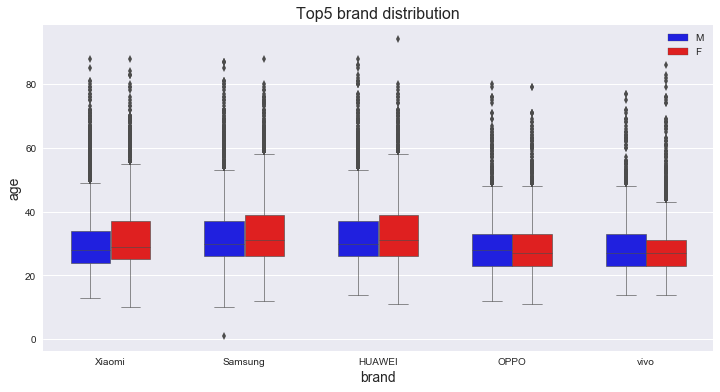

In [121]:
fig,ax = plt.subplots(1)
pal = {'M':'b','F':'r'}
ax = sns.boxplot(x='phone_brand',y='age',data=top5_gender,hue='gender',
                linewidth=0.6,width=0.6,dodge=True,
                order=top5_list,palette=pal)
# ax = sns.swarmplot(x='phone_brand',y='age',data=tem,hue='gender',
#                 color='7',
#                 order=top5_list)
fig.set_figwidth(12)
fig.set_figheight(6)
plt.legend(loc='best')
plt.ylabel('age',fontsize=14)
plt.xlabel('brand',fontsize=14)
plt.title('Top5 brand distribution',fontsize=16)
plt.savefig('Top5 brand distribution',dpi=600)
plt.show()

### count by age

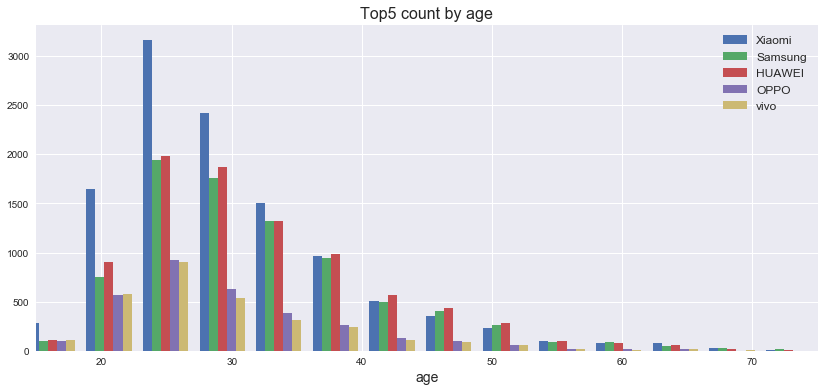

In [122]:
fig = plt.figure(1,figsize=(14,6))
plt.hist([top5_male[top5_male['phone_brand']=='Xiaomi']['age'],
          top5_male[top5_male['phone_brand']=='Samsung']['age'],
          top5_male[top5_male['phone_brand']=='HUAWEI']['age'],
          top5_male[top5_male['phone_brand']=='OPPO']['age'],
          top5_male[top5_male['phone_brand']=='vivo']['age'],],
          rwidth=0.8,
          bins=20,stacked=False)
plt.xlabel('age',fontsize=14)
plt.xlim(15,75)
plt.title('Top5 count by age',fontsize=16)
plt.legend(labels=['Xiaomi','Samsung','HUAWEI','OPPO','vivo'],loc='best',fontsize=12)
plt.savefig('Top5 count by age',dpi=600)
plt.show()

### Top5 stack: count

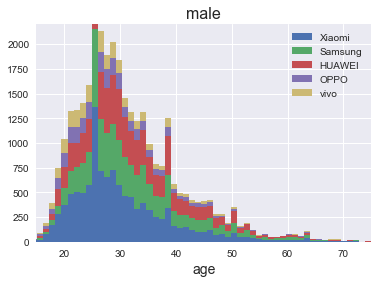

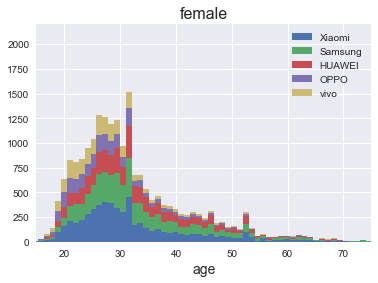

In [123]:
def hist_stack(dataframe,title,filename):
    plt.hist([dataframe[dataframe['phone_brand']=='Xiaomi']['age'],
              dataframe[dataframe['phone_brand']=='Samsung']['age'],
              dataframe[dataframe['phone_brand']=='HUAWEI']['age'],
              dataframe[dataframe['phone_brand']=='OPPO']['age'],
              dataframe[dataframe['phone_brand']=='vivo']['age'],],
              bins=80,stacked=True)
    plt.legend(labels=['Xiaomi','Samsung','HUAWEI','OPPO','vivo'],loc='best')
    plt.xlabel('age',fontsize=14)
    plt.xlim(15,75)
    plt.ylim(0,2200)
    plt.title(str(title),fontsize=16)
    fig.set_figheight(6)
    fig.set_figwidth(8)
    plt.savefig(str(filename),dpi=600)
    plt.show()

hist_stack(top5_male,'male','top5_stack_male')   
hist_stack(top5_female,'female','top5_stack_female')

### top5 stack: percentage

#### define data processing function 

In [24]:
def percentage_split(top5_X,i):
    # groupby age and phone_brand
    data = top5_X.groupby(['age','phone_brand'],as_index=False).count() 
    data.drop('group',inplace=True,axis=1)
    data.columns=['age','phone_brand','count']
    # groupby age
    age = top5_X.groupby(by='age',as_index=False).count()
    age.drop(['group','phone_brand'],inplace=True,axis=1)
    age.columns=['age','total']
    # merger both tables
    data = pd.merge(data,age,on='age')
    data['per']=np.round(data['count']/data['total'],2)
    
    age_all = pd.DataFrame({'age':np.arange(1,89)})
    data=data[data['phone_brand']==top5_list[i]]
    data = pd.merge(age_all,data,on='age',how='left')
    data = data.fillna(0)
    return data

#### call function, parameter: male

In [25]:
male_xiaomi = percentage_split(top5_male,0)
male_Samsung=percentage_split(top5_male,1)
male_HUAWEI=percentage_split(top5_male,2)
male_OPPO=percentage_split(top5_male,3)
male_vivo=percentage_split(top5_male,4)

#### call function, parameter: female

In [26]:
female_xiaomi = percentage_split(top5_female,0)
female_Samsung=percentage_split(top5_female,1)
female_HUAWEI=percentage_split(top5_female,2)
female_OPPO=percentage_split(top5_female,3)
female_vivo=percentage_split(top5_female,4)
top5_list.reverse()
top5_list

['vivo', 'OPPO', 'HUAWEI', 'Samsung', 'Xiaomi']

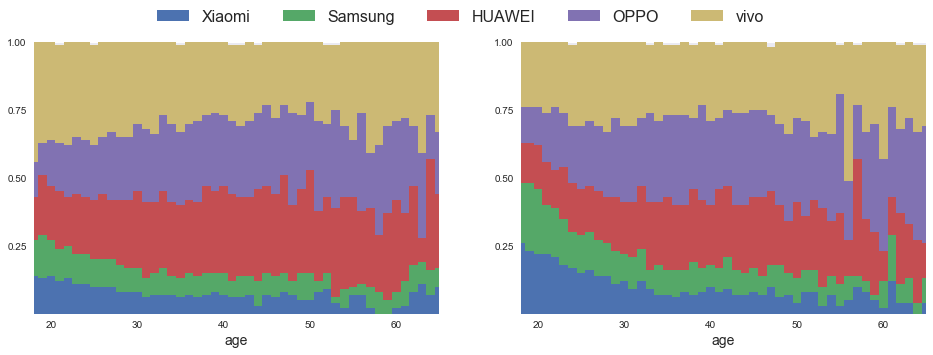

In [124]:
fig,axes = plt.subplots(1,2,figsize=(16,5))
axes[0].bar(male_vivo['age'],male_vivo['per'],width=1)
axes[0].bar(male_OPPO['age'],male_OPPO['per'],bottom=male_vivo['per'],width=1)
axes[0].bar(male_HUAWEI['age'],male_HUAWEI['per'],bottom=male_vivo['per']+male_OPPO['per'],width=1)
axes[0].bar(male_Samsung['age'],male_Samsung['per'],bottom=male_vivo['per']+male_OPPO['per']+male_HUAWEI['per'],width=1)
axes[0].bar(male_xiaomi['age'],male_xiaomi['per'],bottom=male_vivo['per']+male_OPPO['per']+male_HUAWEI['per']+male_Samsung['per'],width=1)

axes[1].bar(female_vivo['age'],female_vivo['per'],width=1)
axes[1].bar(female_OPPO['age'],female_OPPO['per'],bottom=female_vivo['per'],width=1)
axes[1].bar(female_HUAWEI['age'],female_HUAWEI['per'],bottom=female_vivo['per']+female_OPPO['per'],width=1)
axes[1].bar(female_Samsung['age'],female_Samsung['per'],bottom=female_vivo['per']+female_OPPO['per']+female_HUAWEI['per'],width=1)
axes[1].bar(female_xiaomi['age'],female_xiaomi['per'],bottom=female_vivo['per']+female_OPPO['per']+female_HUAWEI['per']+female_Samsung['per'],width=1)

axes[0].set_xlabel('age',fontsize=14)
axes[1].set_xlabel('age',fontsize=14)
axes[0].set_xlim(18,65)
axes[1].set_xlim(18,65)
axes[0].set_ylim(0,1)
axes[1].set_ylim(0,1)
axes[0].set_yticks((0.25,.5,.75,1))
axes[1].set_yticks((0.25,.5,.75,1))
fig.legend(top5_list,fontsize=16,
           bbox_to_anchor=(0.4, 1), loc='upper center',
           ncol=5,borderaxespad=None)
plt.savefig('stacked_gender',dpi=600)
plt.show()

## Distribution heatmap

### import packages and Read file

In [28]:
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [29]:
positions = pd.read_csv('C:/Users/User/talkingdata/events.csv')
print('positions.shape: ',positions.shape)
positions.drop(columns=['event_id'],inplace=True)
print('positions missing data: ',positions.isnull().any().sum())
positions.head()

positions.shape:  (3252950, 5)
positions missing data:  0


,device_id,timestamp,longitude,latitude
0,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


### All Phone_Brand Distribution HeatMap

#### data processing

In [30]:
locations_all=[]
for i in range(positions['longitude'].shape[0]):
    locations_all.append([positions['latitude'].values[i],positions['longitude'].values[i]])

print('length: ',len(locations_all))
locations_all[0]

length:  3252950


[31.24, 121.38]

#### heatmap

In [ ]:
fmap = folium.Map(location=[30, 120],zoom_start=2,tiles='stamentoner')
fmap.add_child(HeatMap(data = locations_all))
fmap.save('all_phoneBrand_heatmap.html')

### Top5 Phone_Brand Distribution HeatMap

#### data processing 1 : extract top5 brand device_id

In [32]:
top5_loc_date = pd.read_csv('C:/Users/User/talkingdata/gender_age_train.csv',index_col=None)
phone = pd.read_csv('C:/Users/User/talkingdata/phone_brand_device_model_traditional.csv',index_col=None)
top5_loc_date = pd.merge(top5_loc_date,phone,how='inner',left_on='device_id',right_on='device_id')
top5_loc_date.drop(['gender','age','Unnamed: 0','group','device_model'],inplace=True,axis=1)

top5_list.reverse()
print('Top5 brand: ',top5_list)
top5_loc_date = top5_loc_date[top5_loc_date['phone_brand'].isin(top5_list)]
print('top5_loc_date.shape: ',top5_loc_date.shape)
top5_loc_date.head()

Top5 brand:  ['Xiaomi', 'Samsung', 'HUAWEI', 'OPPO', 'vivo']
top5_loc_date.shape:  (11460, 2)


,device_id,phone_brand
5,-1297074871525174196,OPPO
8,176515041953473526,vivo
31,7630241409816671260,vivo
36,3549658489155683094,OPPO
59,3098621662950438701,vivo


#### data processing 2 : merge by device_id (locations)

In [33]:
top5_loc_date = pd.merge(top5_loc_date,positions,on='device_id',how='inner')
top5_loc_date.drop_duplicates(inplace=True)
top5_loc = top5_loc_date.drop('timestamp',axis=1)
top5_loc.drop_duplicates(inplace=True)
print('top5_loc.shape: ',top5_loc.shape)
top5_loc.head()

top5_loc.shape:  (10558, 4)


,device_id,phone_brand,longitude,latitude
0,-7882183570062087941,vivo,117.55,33.53
9,-7882183570062087941,vivo,0.00,0.00
27,-7882183570062087941,vivo,117.55,33.54
233,-7882183570062087941,vivo,117.56,33.53
558,-2999736920417270580,OPPO,114.03,30.62


#### data processing 3 : convert to list

In [34]:
locations_top5=[]
for i in range(top5_loc['longitude'].shape[0]):
    locations_top5.append([top5_loc['latitude'].values[i],top5_loc['longitude'].values[i]])

print('length: ',len(locations_top5))
locations_top5[0]

length:  10558


[33.53, 117.55]

#### heatmap

In [ ]:
fmap = folium.Map(location=[30, 120],zoom_start=3,tiles='stamentoner')
fmap.add_child(HeatMap(data = locations_top5))
fmap.save('top5_phoneBrand_heatmap.html')
fmap

### Top5 Phone_Brand and Date Distribution HeatMap 

#### add 'date' column

In [36]:
top5_date = top5_loc_date.copy()
top5_date['date'],top5_date['time'] = top5_date['timestamp'].str.split(' ',1).str
top5_date.head()

,device_id,phone_brand,timestamp,longitude,latitude,date,time
0,-7882183570062087941,vivo,2016-05-01 11:49:33,117.55,33.53,2016-05-01,11:49:33
1,-7882183570062087941,vivo,2016-05-02 15:15:23,117.55,33.53,2016-05-02,15:15:23
2,-7882183570062087941,vivo,2016-05-02 15:15:50,117.55,33.53,2016-05-02,15:15:50
3,-7882183570062087941,vivo,2016-05-04 18:51:09,117.55,33.53,2016-05-04,18:51:09
4,-7882183570062087941,vivo,2016-05-03 21:38:13,117.55,33.53,2016-05-03,21:38:13


#### extract date list

In [37]:
date_list = top5_date['date'].unique()
date_list.sort()
date_list

array(['2016-04-30', '2016-05-01', '2016-05-02', '2016-05-03',
       '2016-05-04', '2016-05-05', '2016-05-06', '2016-05-07'],
      dtype=object)

#### split tables according date and save to list

In [38]:
def date_split(dataframe,i):
    data = dataframe[dataframe['date']==date_list[i]]
    return data

list_df=[]
for i in range(8):
    list_df.append(date_split(top5_date,i))
len(list_df)

8

#### data processing

In [39]:
locations_date_top5=[]
for j in range(len(date_list)):
    tem_list=[]
    for i in range(list_df[j]['longitude'].shape[0]):
        tem_list.append([list_df[j]['latitude'].values[i],list_df[j]['longitude'].values[i]])
    locations_date_top5.append(tem_list)

print('data length: ',len(locations_date_top5))
locations_date_top5[0][0]

data length:  8


[26.14, 108.42]

#### HeatMap with time series

In [ ]:
fmap = folium.Map(location=[32,120],zoom_start=6,tiles='stamentoner')
fmap.add_child(HeatMapWithTime(data=locations_date_top5))
fmap.save('top5_phoneBrand_heatmapwithtime.html')

#### plot with time series

Monday to Sunday counts of users:  [28801, 27456, 26761, 26803, 26196, 25839, 26327]


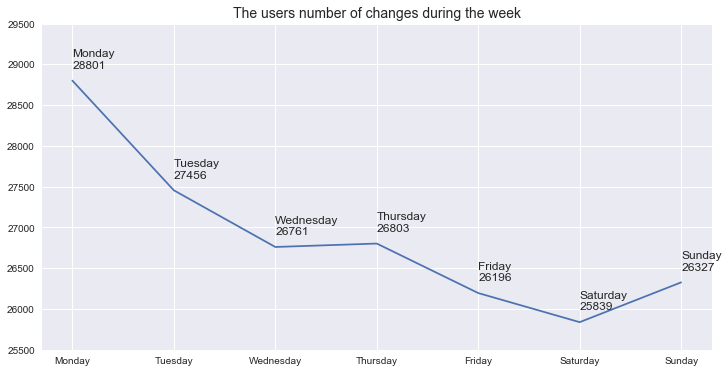

In [96]:
num_users=[]
for i in range(2,8):
    num_users.append(len(list_df[i]))
num_users.append(len(list_df[1]))
print('Monday to Sunday counts of users: ',num_users)

fig,ax = plt.subplots()
plt.plot(num_users)
x_labels=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(np.arange(7),x_labels)
plt.title('The users number of changes during the week',fontsize=14)
for i in range(7):
    plt.text(i,num_users[i]+150,str(x_labels[i]) +'\n'+str(num_users[i]),fontsize=12)
ax.set_ybound(25500,29500)
fig.set_figheight(6)
fig.set_figwidth(12)
plt.savefig('The users number of changes during the week',dpi=600)
plt.show()